In [1]:
import platform
import os
import numpy as np
import tensorflow as tf
gpu_token = tf.test.is_gpu_available('GPU')

if platform.machine() == 'x86_64': 
    if gpu_token:
        os.chdir('/home/ucdasec/Faulthunter-RNN-approach')
    else:
        os.chdir("/home/sakshmeno/Documents/GitHub/C-RNN-approach")
elif platform.machine() == 'arm64':
    os.chdir("/Users/saksh.menon/Documents/GitHub/C-RNN-approach")

from Utils.dataframe_gen import *
from Utils.vector_gen import *
from Utils.w2b_encoding_lw_iter1 import *
from Utils.w2b_encoding_lw_iter2 import *
from Utils.w2b_encoding_lw_iter3 import *
from Utils.w2b_encoding_lw_iter4 import *
from Models.RNN_paper_prototype import *
from Utils.metrics_summary import *

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


2024-04-18 13:09:16.325431: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2024-04-18 13:09:16.325473: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-04-18 13:09:16.325481: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-04-18 13:09:16.325574: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-04-18 13:09:16.325611: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [4]:
encoders = [encoder2, encoder3, encoder4]
models = [model_ver_0, model_ver_5, model_ver_6]
res_dict = {} #(model, encoder) : [hist, pred]

In [19]:
original_df = dataframe_init(gpu_token)[0]
for model in models:
    for encoder in encoders:
        vectors = vec_split(original_df)
        vectors = encoder(vectors)
        tensors = tensor_gen(vectors)
        # Model Training and Prediction
        curr_model = model(tensors[0][0].shape[0])
        history = curr_model.fit(tensors[0], tensors[3], epochs=50, validation_data=(tensors[1],tensors[4]))
        y_pred = curr_model.predict(tensors[2])
        res_dict[(curr_model, encoder)] = [tensors, y_pred, history]

FileNotFoundError: [Errno 2] No such file or directory: '/home/ucdasec/Faulthunter-RNN-approach/dataset'

In [9]:
def results(y_pred, tensors, history):
    classify = lambda x : int(x[0]<x[1])
    classified_outputs = list(map(classify, y_pred))
    classified_labels = list(map(classify, tensors[5]))
    score_summary(classified_labels, classified_outputs, 0)
    true_positives, true_negetives, false_positives, false_negetives = true_false_computation(classified_labels, classified_outputs, 0)
    print('true_positives: {}\ntrue_negetives: {}\nfalse_positives: {}\nfalse_negetives: {}\n'.format(true_positives, true_negetives, false_positives, false_negetives))
    print('#########################################\n')
    score_summary(classified_labels, classified_outputs, 1)
    true_positives, true_negetives, false_positives, false_negetives = true_false_computation(classified_labels, classified_outputs, 1)
    print('true_positives: {}\ntrue_negetives: {}\nfalse_positives: {}\nfalse_negetives: {}\n'.format(true_positives, true_negetives, false_positives, false_negetives))

    import matplotlib.pyplot as plt
    # summarize history for accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

In [2]:
original_df = dataframe_init(gpu_token)[0]
vectors = vec_split(original_df)
vectors = encoder2(vectors)
tensors = tensor_gen(vectors)
# mode = model_ver_6(tensors[0][0].shape[0])
# hist = mode.fit(tensors[0], tensors[3], epochs=50, validation_data=(tensors[1],tensors[4]))
# y_pred = mode.predict(tensors[2])

/Users/saksh.menon/Documents/GitHub/C-RNN-approach/Utils/w2b_encoding_lw_iter2.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vectors[vector]['Encoded Lines'][row[0]] = [eval(i) for i in encodedline]#tuple(encodedline)
/Users/saksh.menon/Documents/GitHub/C-RNN-approach/Utils/w2b_encoding_lw_iter2.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vectors[vector]['Encoded Lines'][row[0]] = [eval(i) for i in encodedline]#tuple(encodedline)
/Users/saksh.menon/Documents/GitHub/C-RNN-approach/Utils/w2b_encoding_lw_iter2.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

For secure:
f1 score:  0.9875930521091811
precision score:  0.9754901960784313
recall score:  0

true_positives: 796
true_negetives: 0
false_positives: 20
false_negetives: 0

#########################################

For insecure:
f1 score:  0.0
precision score:  0
recall score:  0.0

true_positives: 0
true_negetives: 796
false_positives: 0
false_negetives: 20



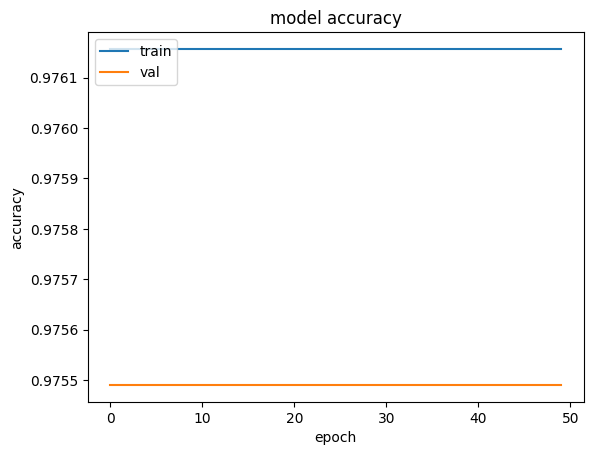

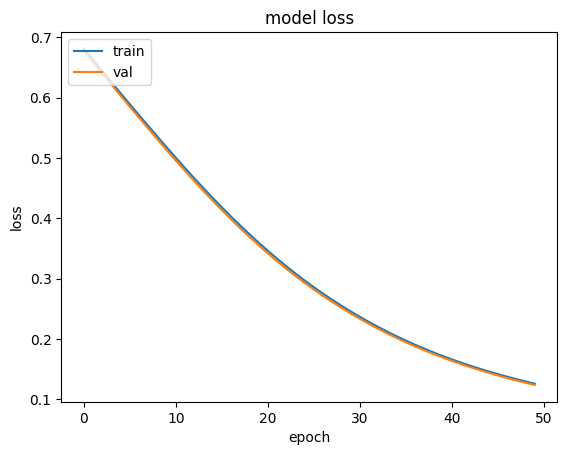

In [10]:
# mode.predict([[1,1,1]])
results(y_pred,tensors,hist)

In [3]:
vectors[2].to_excel("vector2.xlsx")

In [5]:
mode.predict([[1,0]])

1/1 [==============================] - 0s 42ms/step


array([[0.93008876, 0.06991128]], dtype=float32)

For secure:
f1 score:  0.9875621890547264
precision score:  0.9778325123152709
recall score:  0.9974874371859297

true_positives: 794
true_negetives: 2
false_positives: 18
false_negetives: 2

#########################################

For insecure:
f1 score:  0.16666666666666666
precision score:  0.5
recall score:  0.1

true_positives: 2
true_negetives: 794
false_positives: 2
false_negetives: 18



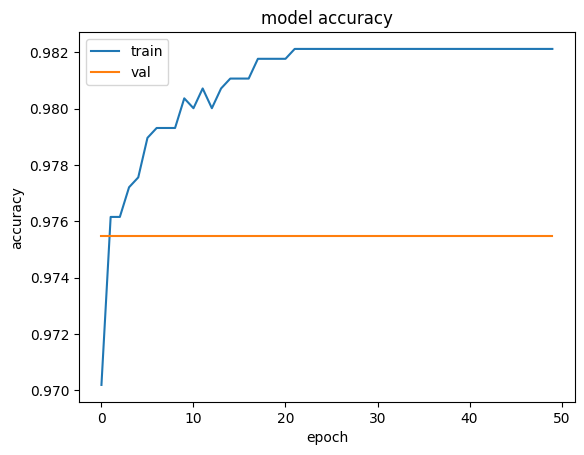

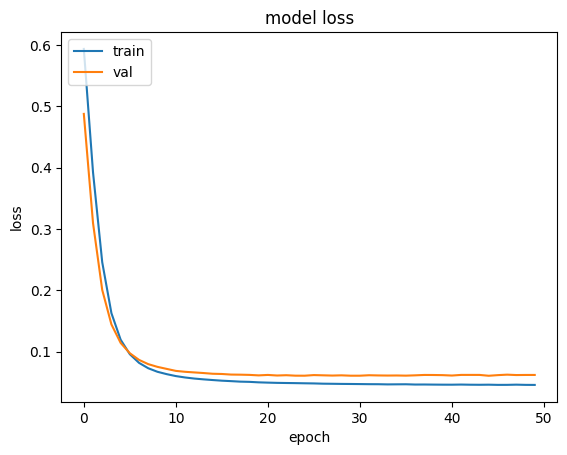

In [141]:
mod = 9
results(y_pred = res_dict[keylst[mod]][1], tensors=res_dict[keylst[mod]][0], history=res_dict[keylst[mod]][2])

In [16]:
!nvidia-smi

shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory
Thu Apr 18 12:29:27 2024       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.147.05   Driver Version: 525.147.05   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  Off  | 00000000:02:00.0 Off |                  N/A |
| 27%   32C    P8     5W / 151W |   7742MiB /  8192MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+-------------------

In [15]:
!

shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory
chdir: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory


In [10]:
!kill 57142

: 

: 